###Objective:
The objective is for a program to learn to accurately classify a mushroom as poisonous or edible, based on its features.

A logistic regression analysis involving gradient descent will be carried out.

In [0]:
from google.colab import files
import pandas as pd
import numpy as np
import time
# done

The data used is from Kaggle: https://www.kaggle.com/uciml/mushroom-classification

Detailed information about the dataset can be found at the webpage linked above.

The dataset is split into two datasets:

1. A training dataset (80% of the original dataset)
2. A testing dataset (20% of the original dataset)

The two datasets are loaded into pandas dataframes in the following cell.

In [2]:
# Load training data from CSV file into pandas dataframe
CSVTrain = pd.read_csv("https://raw.githubusercontent.com/Toocgit/mushrooms/master/mushrooms_train.csv")

# Load test data from CSV file into pandas dataframe
CSVTest = pd.read_csv("https://raw.githubusercontent.com/Toocgit/mushrooms/master/mushrooms_test.csv")

# Verify type dataframe and dataframe dimensions
print(type(CSVTrain), CSVTrain.shape)
print(type(CSVTest), CSVTest.shape)
# done

<class 'pandas.core.frame.DataFrame'> (6509, 23)
<class 'pandas.core.frame.DataFrame'> (1615, 23)


In the following code cell, the datasets are broken up into:
1. Labels (mushroom classifications, poisonous / edible)
2. Features (mushroom characteristics)

There will be:
1. Training features
2. Training labels
3. Testing features
4. Testing labels

In [3]:
# Separate labels and features, for training and testing datasets
trainLabels = CSVTrain.iloc[:, [0]]
trainFeatures = CSVTrain.iloc[:, 1:23]
testLabels = CSVTest.iloc[:, [0]]
testFeatures = CSVTest.iloc[:, 1:23]

# Verify type dataframe and dataframe dimensions
print(type(trainLabels), trainLabels.shape)
print(type(trainFeatures), trainFeatures.shape)
print(type(testLabels), testLabels.shape)
print(type(testFeatures), testFeatures.shape)
# done

<class 'pandas.core.frame.DataFrame'> (6509, 1)
<class 'pandas.core.frame.DataFrame'> (6509, 22)
<class 'pandas.core.frame.DataFrame'> (1615, 1)
<class 'pandas.core.frame.DataFrame'> (1615, 22)


The mushroom data is categorical. In the following cell, the unique categorical values are obtained for the training and testing, labels and features.

In [4]:
# Get unique categorical values for train and test, labels and features
UniTrainLabels = trainLabels.nunique(axis=0, dropna=False)
UniTrainFeatures = trainFeatures.nunique(axis=0, dropna=False)
UniTestLabels = testLabels.nunique(axis=0, dropna=False)
UniTestFeatures = testFeatures.nunique(axis=0, dropna=False)

# Print number of unique categorical values for train and test, labels and features
print(sum(UniTrainLabels))
print(sum(UniTrainFeatures))
print(sum(UniTestLabels))
print(sum(UniTestFeatures))
# done

2
117
2
83


Using the training and testing feature datasets, create training and testing indicator feature datasets. One indicator feature for each regular feature unique categorical value.

In [5]:
# Create indicator features from categorical features
IndTrainFeatures = pd.get_dummies(trainFeatures)
IndTestFeatures = pd.get_dummies(testFeatures)

# Verify type dataframe and dimensions for train and test, indicator feature sets
print(type(IndTrainFeatures), IndTrainFeatures.shape)
print(type(IndTestFeatures), IndTestFeatures.shape)
# done

<class 'pandas.core.frame.DataFrame'> (6509, 117)
<class 'pandas.core.frame.DataFrame'> (1615, 83)


In the following code cell, indicator features are downloaded for an offline check on accuracy.

In [0]:
# Store first three records of train indicator feature set in dummiesCheck
dummiesCheck = IndTrainFeatures.head(3)

# Write dummiesCheck to CSV file and download it to a local computer directory
with open('dummiesCheck.csv', 'w') as f:
  f.write(dummiesCheck.to_csv())
files.download('dummiesCheck.csv')
# dummiesCheck.csv was reconciled with mushrooms_train.csv
# done

There is a discrepancy in the number of unique categorical values, found in the training features and the testing features. The discrepancy carried across into the training and testing indicator features.

An offline check is done to verify that the training features include all of the unique categorical values found in the original full mushroom dataset as sourced from Kaggle.

In the following code cell, a reconciliation is done between the training and testing unique indicator features.

In [7]:
# Get a list of the train and test, indicator feature names
IndTrainColumns = IndTrainFeatures.columns.values.tolist()
IndTestColumns = IndTestFeatures.columns.values.tolist()

# Verify type list and number of list items, for IndTrainColumns and IndTestColumns
print(type(IndTrainColumns), len(IndTrainColumns))
print(type(IndTestColumns), len(IndTestColumns))
# done

<class 'list'> 117
<class 'list'> 83


Sense check the training and testing indicator feature headers:

In [8]:
# Sense check values in IndTrainColumns and IndTestColumns
print(IndTrainColumns[0:5])
print(IndTestColumns[0:5])
# done

['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s']
['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_x']


Check which indicator features are missing from the testing indicator features:

In [9]:
MissingIndTestColumns = {}

# For every training data indicator feature
for IndFe in range(len(IndTrainColumns)):
  # Check if the indicator feature is not in the test data indicator features
  if IndTrainColumns[IndFe] not in IndTestColumns:
    # If it is not, add it to MissingIndTestColumns
    MissingIndTestColumns[IndFe] = IndTrainColumns[IndFe]

# Check type, length and values of MissingIndTestColumns
print(type(MissingIndTestColumns), len(MissingIndTestColumns), MissingIndTestColumns)
# done

<class 'dict'> 34 {4: 'cap-shape_s', 7: 'cap-surface_g', 10: 'cap-color_b', 16: 'cap-color_r', 17: 'cap-color_u', 22: 'odor_a', 23: 'odor_c', 25: 'odor_l', 28: 'odor_p', 38: 'gill-color_e', 40: 'gill-color_h', 41: 'gill-color_k', 45: 'gill-color_r', 46: 'gill-color_u', 54: 'stalk-root_e', 55: 'stalk-root_r', 56: 'stalk-surface-above-ring_f', 60: 'stalk-surface-below-ring_f', 64: 'stalk-color-above-ring_b', 66: 'stalk-color-above-ring_e', 67: 'stalk-color-above-ring_g', 73: 'stalk-color-below-ring_b', 75: 'stalk-color-below-ring_e', 76: 'stalk-color-below-ring_g', 91: 'ring-type_f', 92: 'ring-type_l', 96: 'spore-print-color_h', 97: 'spore-print-color_k', 100: 'spore-print-color_r', 101: 'spore-print-color_u', 104: 'population_a', 113: 'habitat_m', 115: 'habitat_u', 116: 'habitat_w'}


For each indicator feature missing from the testing indicator features, its position in the training indicator features is recorded. Below, a list of those positions is created.

In [10]:
# For the indicator features missing from the test data, get their position in the training data
colIndex = list(MissingIndTestColumns.keys())

# Check type, length and values of colIndex
print(type(colIndex), len(colIndex), colIndex)
# done

<class 'list'> 34 [4, 7, 10, 16, 17, 22, 23, 25, 28, 38, 40, 41, 45, 46, 54, 55, 56, 60, 64, 66, 67, 73, 75, 76, 91, 92, 96, 97, 100, 101, 104, 113, 115, 116]


Add missing indicator features into the testing indicator features dataframe and set all records to zero to indicate feature absent for each testing mushroom:

In [11]:
# For each missing indicator feature
for index in range(len(colIndex)):
  # Insert the missing indicator feature into the test data, with all values as 0
  IndTestFeatures.insert(colIndex[index], MissingIndTestColumns[colIndex[index]], 0)

# Verify updated dimensions of IndTestFeatures
IndTestFeatures.shape
# done

(1615, 117)

Verify the same unique indicator features exist in the training and testing indicator features:

In [12]:
# Get updated list of the train and test, indicator feature names
IndTrainColumns = IndTrainFeatures.columns.values.tolist()
IndTestColumns = IndTestFeatures.columns.values.tolist()

# Check the train indicator features and test indicator features match
print((IndTrainColumns == IndTestColumns))
# done

True


For the indicator features added into the testing indicator features dataframe, check all the values are zero:

In [13]:
missColValuesSum = 0

# For each of the columns added to IndTestFeatures
for num in range(len(colIndex)):
  # Add the sum of that column's values to missColValuesSum
  missColValuesSum += IndTestFeatures[MissingIndTestColumns[colIndex[num]]].sum()

# Print missColValuesSum
print(missColValuesSum)
# done

0


In [14]:
# Sense check index for series and sum method
print(type(IndTestFeatures["cap-shape_b"]), IndTestFeatures["cap-shape_b"].sum())
# done

<class 'pandas.core.series.Series'> 140


Create new label dataframes, replacing value p (poisonous) with 1, and value e (edible) with 0:

In [15]:
# For train and test labels, convert p to 1 and e to 0
mapping = {'p': 1, 'e': 0}
trainDataLabels = pd.DataFrame(trainLabels.iloc[:, 0].map(mapping))
testDataLabels = pd.DataFrame(testLabels.iloc[:, 0].map(mapping))

# Check type, dimensions, number unique and sample values for trainDataLabels and testDataLabels
print(type(trainDataLabels), trainDataLabels.shape, trainDataLabels.nunique(axis=0, dropna=False))
print(type(testDataLabels), testDataLabels.shape, testDataLabels.nunique(axis=0, dropna=False))
print(trainDataLabels.head(3), testDataLabels.head(3))
# done

<class 'pandas.core.frame.DataFrame'> (6509, 1) class    2
dtype: int64
<class 'pandas.core.frame.DataFrame'> (1615, 1) class    2
dtype: int64
   class
0      1
1      0
2      0    class
0      1
1      1
2      1


Create numpy ndarrays from pandas dataframes:

In [16]:
# Create numpy ndarrays for indicator features and labels (train and test)
npTrainFeat = IndTrainFeatures.values
npTestFeat = IndTestFeatures.values
npTrainLabel = trainDataLabels.values
npTestLabel = testDataLabels.values

# Verify type, shape and transpose of each ndarray
print(type(npTrainFeat), npTrainFeat.shape, npTrainFeat.T.shape)
print(type(npTestFeat), npTestFeat.shape, npTestFeat.T.shape)
print(type(npTrainLabel), npTrainLabel.shape, npTrainLabel.T.shape)
print(type(npTestLabel), npTestLabel.shape, npTestLabel.T.shape)
# done

<class 'numpy.ndarray'> (6509, 117) (117, 6509)
<class 'numpy.ndarray'> (1615, 117) (117, 1615)
<class 'numpy.ndarray'> (6509, 1) (1, 6509)
<class 'numpy.ndarray'> (1615, 1) (1, 1615)


In the following code cell, the sigmoid function is defined.

In [0]:
# I wrote this function as a part of course 1 of Andrew Ng's Deep Learning Specialisation

# Define sigmoid activation function
def sigmoid(z):
    """
    Compute the sigmoid of z
    Arguments:
    z -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(z)
    """
    s = 1 / (1 + np.exp(-(z)))

    return s
# done

In the following code cell, a function is defined to initialise hypothesis function parameters, a set of weights and a bias, to zero.

In [0]:
# I wrote this function as a part of course 1 of Andrew Ng's Deep Learning Specialisation

# Define function to initialise hypothesis function parameters to 0
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    Argument:
    dim -- size of the w vector we want
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (the bias)
    """
    w = np.zeros((dim, 1))
    b = 0

    # Verify dimensions of w
    assert (w.shape == (dim, 1))
    # Verify type of b
    assert (isinstance(b, float) or isinstance(b, int))

    return w, b
# done

In the following code cell, a function is defined to:
1. Get the number of dataset examples
2. For every mushroom, calculate the probability of it being poisonous
3. Calculate the cost
4. Calculate the gradient of the cost function

In [0]:
# I wrote this function as a part of course 1 of Andrew Ng's Deep Learning Specialisation

# Calculate cost and its derivative with respect to hypothesis function parameters
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient
    Arguments:
    w -- weights (number of features, 1)
    b -- bias, a real number
    X -- features of size (number of features, number of examples)
    Y -- true "label" vector of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """

    # Get number of examples
    m = X.shape[1]

    # Calculate sigmoid of all examples
    A = sigmoid((np.dot(w.T, X) + b))

    # Calculate cost
    cost = (-(1 / m)) * np.sum((Y * np.log(A)) + ((1 - Y) * np.log(1 - A)))

    # Calculate cost gradient, with respect to hypothesis function weights
    dw = np.dot(X, (A - Y).T) / m

    # Calculate cost gradient, with respect to hypothesis function bias
    db = np.sum(A - Y) / m

    # Verify cost partial derivative for each weight
    assert (dw.shape == w.shape)

    # Verify db data type
    assert (db.dtype == float)

    # Verify cost shape
    cost = np.squeeze(cost)
    assert (cost.shape == ())

    # Create dict for dw and db
    grads = {"dw": dw,
             "db": db}

    return grads, cost
# done

Define a function for gradient descent:

In [0]:
# I wrote this function as a part of course 1 of Andrew Ng's Deep Learning Specialisation

# Define gradient descent algorithm
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost):
    """
    This function optimizes w and b by running a gradient descent algorithm
    Arguments:
    w -- weights (number of features, 1)
    b -- bias, a real number
    X -- features of size (number of features, number of examples)
    Y -- true "label" vector of size (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the cost with respect to the weights and bias
    costs -- list of all the costs computed during the optimization
    """

    costs = []

    # For each iteration
    for i in range(num_iterations):

        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)

        # Retrieve partial derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # Parameter update rule
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)

        # Record every hundredth cost
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))

    # Create dict of learned optimal parameters
    params = {"w": w,
              "b": b}

    # Create dict of most recent cost partial derivatives
    grads = {"dw": dw,
             "db": db}

    return params, grads, costs
# done

In the following code cell, a function is defined to classify a mushroom as poisonous or edible.

In [0]:
# I wrote this function as a part of course 1 of Andrew Ng's Deep Learning Specialisation

# Define function to predict whether mushroom is poisonous or edible
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    Arguments:
    w -- weights (number of features, 1)
    b -- bias, a real number
    X -- features of size (number of features, number of examples)

    Returns:
    Y_prediction -- a vector containing all predictions (0/1) for the examples in X
    '''
    
    # Get example count
    m = X.shape[1]
    
    # Set prediction for all examples to 0
    Y_prediction = np.zeros((1,m))
    
    # Ensure correct shape for weights
    w = w.reshape(X.shape[0], 1)
    
    # Compute probability of each mushroom being poisonous
    A = sigmoid(np.dot(w.T, X) + b)
    
    # For each mushroom a poisonous probability was computed for...
    for i in range(A.shape[1]):
        
        # If probability A[0,i] > 0.5
        if A[0, i] > 0.5:
            # Update prediction p[0,i] to poisonous
            Y_prediction[0, i] = 1
        
    # Verify Y_prediction shape
    assert (Y_prediction.shape == (1, m))
    
    return Y_prediction
# done

Define logistic regression model with gradient descent:

In [0]:
# I wrote this function as a part of course 1 of Andrew Ng's Deep Learning Specialisation

# Define logistic regression model function
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost):
    """
    Builds the logistic regression model by calling the functions defined above
    Arguments:
    X_train -- training set of shape (number of features, number of examples)
    Y_train -- training labels of shape (1, number of examples)
    X_test -- test set of shape (number of features, number of examples)
    Y_test -- test labels of shape (1, number of examples)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    # Initialize hypothesis function parameters to zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Run gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Make predictions for test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print prediction accuracy
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}
    
    return d
# done

In the following code cell, the logistic regression model is executed for the first time. 2000 gradient descent steps are taken and the learning rate is 0.015.

After learning some hypothesis function parameters using the training data, the program is able to accurately classify 97% of the training data mushrooms as poisonous or edible.

The same percentage of correct classifications is achieved on the testing data mushrooms.

In [23]:
# First run of logistic regression model
m1Start = time.time()
model_one = model(npTrainFeat.T, npTrainLabel.T, npTestFeat.T, npTestLabel.T, 2000, 0.015, True)
m1End = time.time()
print("Runtime in seconds: ", (m1End - m1Start))
# done

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.420332
Cost after iteration 200: 0.325161
Cost after iteration 300: 0.274102
Cost after iteration 400: 0.240839
Cost after iteration 500: 0.216834
Cost after iteration 600: 0.198427
Cost after iteration 700: 0.183739
Cost after iteration 800: 0.171676
Cost after iteration 900: 0.161551
Cost after iteration 1000: 0.152903
Cost after iteration 1100: 0.145410
Cost after iteration 1200: 0.138839
Cost after iteration 1300: 0.133017
Cost after iteration 1400: 0.127813
Cost after iteration 1500: 0.123125
Cost after iteration 1600: 0.118873
Cost after iteration 1700: 0.114993
Cost after iteration 1800: 0.111434
Cost after iteration 1900: 0.108153
train accuracy: 97.89522200030727 %
test accuracy: 97.46130030959752 %
Runtime in seconds:  10.461497783660889


In the following code cell, the logistic regression model is executed for a second time. 20000 gradient descent steps are taken and the learning rate is unchanged at 0.015.
The training data classification accuracy is improved at 99%. The testing data classification accuracy is unchanged at 97%.

In [24]:
# Second run of logistic regression model
m2Start = time.time()
model_two = model(npTrainFeat.T, npTrainLabel.T, npTestFeat.T, npTestLabel.T, 20000, 0.015, True)
m2End = time.time()
print("Runtime in seconds: ", (m2End - m2Start))
# done

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.420332
Cost after iteration 200: 0.325161
Cost after iteration 300: 0.274102
Cost after iteration 400: 0.240839
Cost after iteration 500: 0.216834
Cost after iteration 600: 0.198427
Cost after iteration 700: 0.183739
Cost after iteration 800: 0.171676
Cost after iteration 900: 0.161551
Cost after iteration 1000: 0.152903
Cost after iteration 1100: 0.145410
Cost after iteration 1200: 0.138839
Cost after iteration 1300: 0.133017
Cost after iteration 1400: 0.127813
Cost after iteration 1500: 0.123125
Cost after iteration 1600: 0.118873
Cost after iteration 1700: 0.114993
Cost after iteration 1800: 0.111434
Cost after iteration 1900: 0.108153
Cost after iteration 2000: 0.105115
Cost after iteration 2100: 0.102291
Cost after iteration 2200: 0.099657
Cost after iteration 2300: 0.097192
Cost after iteration 2400: 0.094879
Cost after iteration 2500: 0.092702
Cost after iteration 2600: 0.090648
Cost after iteration 2700: 0.088706
Cost

A third run of the logistic regression model is executed in the following code cell. 2000 gradient descent steps are taken and the learning rate is 0.5.
The program is able to accurately classify 99% of the training mushrooms and 98% of the testing mushrooms.

In [25]:
# Third run of logistic regression model
m3Start = time.time()
model_three = model(npTrainFeat.T, npTrainLabel.T, npTestFeat.T, npTestLabel.T, 2000, 0.5, True)
m3End = time.time()
print("Runtime in seconds: ", (m3End - m3Start))
# done

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.078084
Cost after iteration 200: 0.051024
Cost after iteration 300: 0.039199
Cost after iteration 400: 0.032351
Cost after iteration 500: 0.027796
Cost after iteration 600: 0.024501
Cost after iteration 700: 0.021978
Cost after iteration 800: 0.019969
Cost after iteration 900: 0.018319
Cost after iteration 1000: 0.016933
Cost after iteration 1100: 0.015748
Cost after iteration 1200: 0.014721
Cost after iteration 1300: 0.013819
Cost after iteration 1400: 0.013021
Cost after iteration 1500: 0.012309
Cost after iteration 1600: 0.011670
Cost after iteration 1700: 0.011092
Cost after iteration 1800: 0.010568
Cost after iteration 1900: 0.010090
train accuracy: 99.89245659855584 %
test accuracy: 98.45201238390092 %
Runtime in seconds:  9.667662143707275


In [26]:
# Check for expected keys in model output dicts
print(model_one.keys())
print(model_two.keys())
print(model_three.keys())
# done

dict_keys(['costs', 'Y_prediction_test', 'Y_prediction_train', 'w', 'b', 'learning_rate', 'num_iterations'])
dict_keys(['costs', 'Y_prediction_test', 'Y_prediction_train', 'w', 'b', 'learning_rate', 'num_iterations'])
dict_keys(['costs', 'Y_prediction_test', 'Y_prediction_train', 'w', 'b', 'learning_rate', 'num_iterations'])


An interesting observation in the following code cell output is that the learned bias of the first and third model act to classify mushrooms as poisonous whereas the learned bias of the second model would act to classify mushrooms as edible.

This variability requires further investigation, outside the scope of this project.

In [27]:
# Check value of learned bias for each model
print(model_one['b'])
print(model_two['b'])
print(model_three['b'])
# done

0.010509180779368665
-0.0019200792399652418
0.007252501284600106


In [28]:
# Check data type of model learned weights
type(model_one['w'])
# done

numpy.ndarray

In [29]:
# Create dataframe for each model learned weights
m1weights = pd.DataFrame.from_dict(model_one['w'])
m2weights = pd.DataFrame.from_dict(model_two['w'])
m3weights = pd.DataFrame.from_dict(model_three['w'])

# Check for dataframe type and shape
print(type(m1weights), m1weights.shape)
print(type(m2weights), m2weights.shape)
print(type(m3weights), m3weights.shape)
# done

<class 'pandas.core.frame.DataFrame'> (117, 1)
<class 'pandas.core.frame.DataFrame'> (117, 1)
<class 'pandas.core.frame.DataFrame'> (117, 1)


In [30]:
# Sense check weight values
print(m1weights.head(3))
print(m2weights.head(3))
print(m3weights.head(3))
# done

          0
0 -0.056552
1  0.006831
2  0.081142
          0
0  0.213989
1  0.073459
2  0.093557
          0
0  0.542081
1  0.207228
2  0.026127


The following two code cells involve a check on the greatest learned weight for each model and as a consequence, the most significant feature for a poisonous classification. All three models point to indicator feature 24, see further below for what feature that is.

In [31]:
# Find greatest weight for each model
print(m1weights.iloc[:, 0].idxmax(), m1weights.iloc[:, 0].max())
print(m2weights.iloc[:, 0].idxmax(), m2weights.iloc[:, 0].max())
print(m3weights.iloc[:, 0].idxmax(), m3weights.iloc[:, 0].max())
# done

24 0.916698404805886
24 1.8447427687724076
24 2.5064639850291943


In [32]:
# Sense check last code cell
print(m1weights.iloc[24, 0])
print(m2weights.iloc[24, 0])
print(m3weights.iloc[24, 0])
# done

0.916698404805886
1.8447427687724076
2.5064639850291943


In [0]:
# Create dataframes of model costs
m1costs = pd.DataFrame.from_dict(model_one['costs'])
m2costs = pd.DataFrame.from_dict(model_two['costs'])
m3costs = pd.DataFrame.from_dict(model_three['costs'])
# done

In the following code cell, the 'learning curve' for each model is plot. The y axis has the cost function output and the x axis has every one hundredth gradient descent step. The model three plot is where the cost minimises to convergence very quickly, after what looks like about 100 gradient descent steps. Model three used the greatest learning rate.

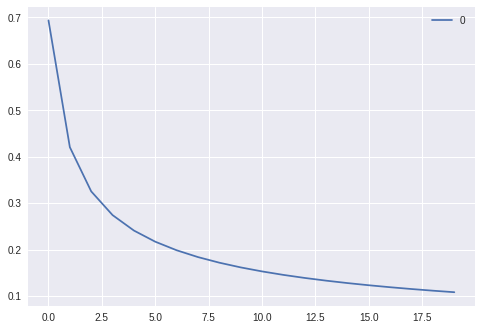

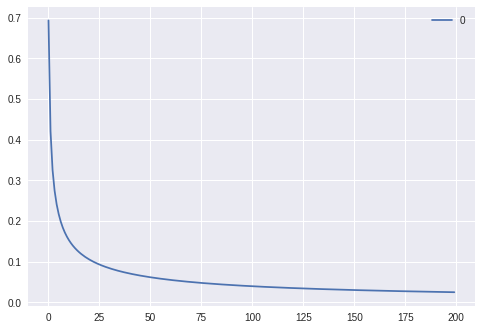

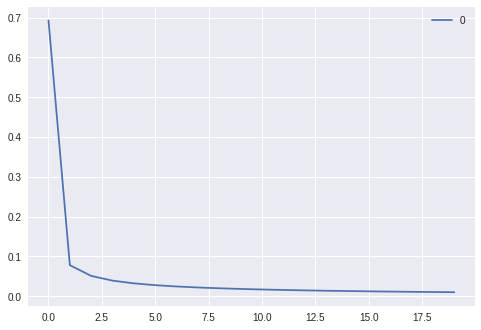

In [34]:
# Plot learning curves
m1costs.plot.line()
m2costs.plot.line()
m3costs.plot.line()
# done

In the following code cell, a check on each model's five greatest learned weights is done and, as a result, the five most significant features that contribute to a poisonous classification.

Interestingly, there is variability across the models as to what the five most significant features to a poisonous classification are. Further investigation is required, outside the scope of this project.

In [35]:
# Check five greatest weights per model
print(m1weights.nlargest(5, 0))
print(m2weights.nlargest(5, 0))
print(m3weights.nlargest(5, 0))
# done

            0
24   0.916698
36   0.747348
96   0.673443
108  0.585371
57   0.572514
           0
24  1.844743
52  1.528609
28  1.452484
36  1.379474
23  1.235566
            0
24   2.506464
52   2.263623
28   2.092444
23   2.030237
100  1.957834


In the following code cell, a check on each model's five smallest learned weights is performed and, as a result, which five features per model are most significant to an edible classification.

Again there is variability across the models as to what the five most significant features to an edible classification are, further investigation is required.

In [36]:
# Check five smallest weights per model
print(m1weights.nsmallest(5, 0))
print(m2weights.nsmallest(5, 0))
print(m3weights.nsmallest(5, 0))
# done

           0
27 -1.325841
35 -0.736839
98 -0.515929
58 -0.490938
97 -0.474107
           0
27 -2.812242
35 -1.381394
22 -1.260489
25 -1.260489
53 -1.109363
           0
27 -3.708213
25 -2.061147
22 -2.061147
35 -1.902235
53 -1.456662


The next six code cells involve checks on indexes.

In [37]:
# Check shape and index of weights
print(m1weights.shape)
print(m1weights.index)
# done

(117, 1)
RangeIndex(start=0, stop=117, step=1)


In [38]:
# Verify index 117 is out of range
m1weights.iloc[117, 0]
# done

IndexError: ignored

In [39]:
# Verify index 116 in range
m1weights.iloc[116, 0]
# done

-0.15056092995012443

In [40]:
# Check length of list IndTrainColumns
len(IndTrainColumns)
# done

117

In [41]:
# Check index 117 out of range
IndTrainColumns[117]
# done

IndexError: ignored

In [42]:
# Check index 116 in range
IndTrainColumns[116]
# done

'habitat_w'

All three models learned weights which indicate:
1. Mushroom odor of f (foul) is the most significant feature / common characteristic of poisonous mushrooms.
2. Mushroom odor of n (none) is the most significant feature / common characteristic of edible mushrooms.

In [43]:
# Check what are indicator features [24] and [27]
print(IndTrainColumns[24])
print(IndTrainColumns[27])
# done

odor_f
odor_n
